In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.insert(0, os.path.abspath('../src'))
from shallowwater import (ModelParams, make_grid, setup_initial_state, wind_gyre_forcing,
                          run_model, compute_dt_cfl,animate_eta,coast_hovmoller)
import numpy as np
import matplotlib.pyplot as plt


### f-plane

In [2]:
# --- Poincaré → Kelvin waves (no forcing, no friction), using setup_initial_state(..., mode="gaussian_bump") ---

Nx, Ny = 64, 64
Lx, Ly = 2.0e6, 2.0e6
grid = make_grid(Nx, Ny, Lx, Ly)

# f-plane to focus on inertia–gravity + coastal Kelvin (no Rossby effects)
params = ModelParams(
    H=500.0, g=9.81, rho=1025.0,
    f0=1e-4, beta=0.0, y0=Ly/2,
    r = 1.0 / (2 * 86400),  # ≈ 1.1574e-6 s^-1
    linear=True
)

# CFL step based on external gravity-wave speed
dt = compute_dt_cfl(grid, params, cfl=0.5)
tmax = 3 * 86400.0   # ~3 days is enough to see reflection + Kelvin propagation

# Initial condition: small Gaussian bump away from the walls (clean interior radiation first)
ic_fn = lambda g, p: setup_initial_state(
    g, p,
    mode="gaussian_bump",
    amp=0.02,         # meters (small: linear regime)
    R=2.5e5,          # e-folding radius (m)
    x0=0.50 * Lx,     # place off-center so the first landfall is clear
    y0=1.00 * Ly
)

# No forcing anywhere, at any time
from shallowwater import zero_forcing
forcing_fn = lambda t, g, p: zero_forcing(t, g, p)

# Save often to resolve the wavefront approaching the coast
out = run_model(
    tmax, dt, grid, params,
    forcing_fn, ic_fn,
    save_every=4,          # more frequent snapshots to see propagation
    out_vars=("eta",)
)

print('Saved steps:', len(out['time']))

Saved steps: 291


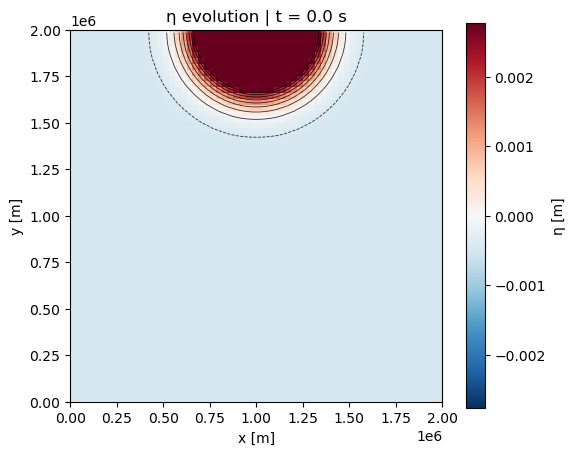

In [4]:
from shallowwater import animate_eta

# Visualize eta(x,y,t) as an animation and display it inline
anim = animate_eta(out, grid, interval=120, title="η evolution")  # interval in ms

# GIF (no external dependencies)
anim.save("eta_02.gif", fps=10)

# MP4 (requires ffmpeg available on your PATH)
# anim.save("eta.mp4", fps=20)


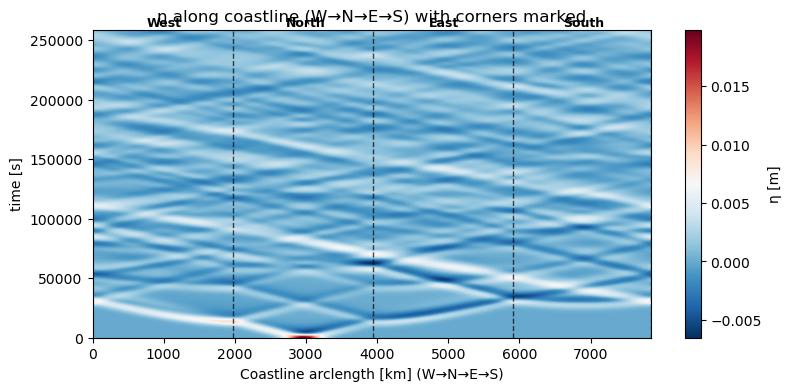

In [5]:
fig = coast_hovmoller(out, grid, units_x="km",
                      title="η along coastline (W→N→E→S) with corners marked")

### No rotation

In [2]:
# --- Gravity waves (no rotation)

Nx, Ny = 64, 64
Lx, Ly = 2.0e6, 2.0e6
grid = make_grid(Nx, Ny, Lx, Ly)

# no rotation
params = ModelParams(
    H=500.0, g=9.81, rho=1025.0,
    f0=0.0, beta=0.0, y0=Ly/2,
    r = 1.0 / (2 * 86400),  # ≈ 1.1574e-6 s^-1
    linear=True
)

# CFL step based on external gravity-wave speed
dt = compute_dt_cfl(grid, params, cfl=0.5)
tmax = 3 * 86400.0   # ~3 days is enough to see reflection + Kelvin propagation

# Initial condition: small Gaussian bump away from the walls (clean interior radiation first)
ic_fn = lambda g, p: setup_initial_state(
    g, p,
    mode="gaussian_bump",
    amp=0.02,         # meters (small: linear regime)
    R=2.5e5,          # e-folding radius (m)
    x0=0.50 * Lx,     # place off-center so the first landfall is clear
    y0=1.00 * Ly
)

# No forcing anywhere, at any time
from shallowwater import zero_forcing
forcing_fn = lambda t, g, p: zero_forcing(t, g, p)

# Save often to resolve the wavefront approaching the coast
out = run_model(
    tmax, dt, grid, params,
    forcing_fn, ic_fn,
    save_every=4,          # more frequent snapshots to see propagation
    out_vars=("eta",)
)

print('Saved steps:', len(out['time']))

Saved steps: 291


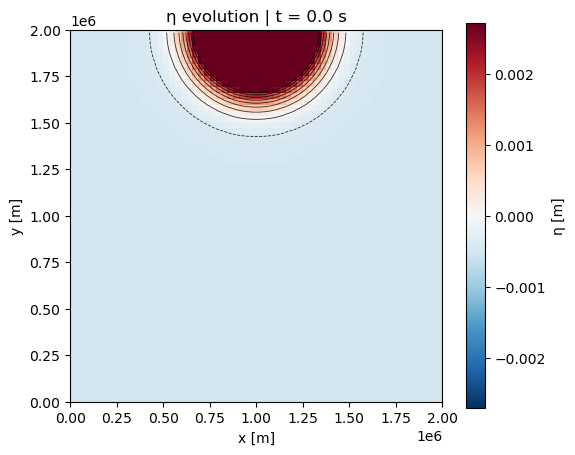

In [4]:
from shallowwater import animate_eta

# Visualize eta(x,y,t) as an animation and display it inline
anim = animate_eta(out, grid, interval=120, title="η evolution")  # interval in ms

# GIF (no external dependencies)
anim.save("eta_02b_no_rotation.gif", fps=10)

# MP4 (requires ffmpeg available on your PATH)
# anim.save("eta.mp4", fps=20)


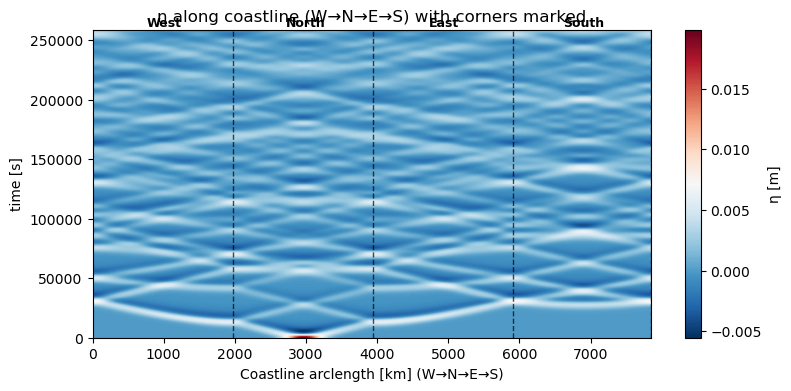

In [5]:
fig = coast_hovmoller(out, grid, units_x="km",
                      title="η along coastline (W→N→E→S) with corners marked")